# Get Data


In [1]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz

file_id = '12nRGXBL6u38sCET_x1OmLW6Hlthob-e_' # app_data_final.csv
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [3]:
# The shareable link
link = 'https://drive.google.com/open?id=12nRGXBL6u38sCET_x1OmLW6Hlthob-e_'

In [4]:
# Verify everything after '='
fluff, id = link.split('=')
print (id) 

12nRGXBL6u38sCET_x1OmLW6Hlthob-e_


### Import libraries and prepare the data

In [5]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size']=24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale=2)

# To ignore deprecation warnings
import warnings
warnings.filterwarnings("ignore")

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment=None

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

# Classification report
from sklearn.metrics import classification_report

In [6]:
# Stored dataset in a Pandas Dataframe
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('app_data_final.csv') 

# Read in data into a dataframe
df = pd.read_csv('app_data_final.csv')

# Display top of dataframe
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,NaN,1,0,Laborers,1.0,2,10,Business Entity Type 3,0.083037,0.262949,0.139376,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,NaN,1,0,Core staff,2.0,1,11,School,0.311267,0.622246,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,26.0,1,0,Laborers,1.0,2,9,Government,NaN,0.555912,0.729567,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,NaN,0,0,Laborers,2.0,2,17,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,NaN,0,0,Core staff,1.0,2,11,Religion,NaN,0.322738,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df.shape

(307511, 34)

In [8]:
# Change behaviour globaly
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [9]:
df.select_dtypes(include=['object']).head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,Business Entity Type 3
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,School
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,Government
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,Business Entity Type 3
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,Religion


In [10]:
# Statistics for each column
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000,307511.000,307511.000,307511.000,307511.000,307499.000,307233.000,307511.000,104582.000,307511.000,307511.000,307509.000,307511.000,307511.000,134133.000,306851.000,246546.000,265992.000,265992.000,265992.000,265992.000,265992.000,265992.000
mean,278180.519,0.081,0.417,168797.919,599026.000,27108.574,538396.207,0.021,12.061,0.281,0.057,2.153,2.052,12.063,0.502,0.514,0.511,0.006,0.007,0.034,0.267,0.265,1.900
std,102790.175,0.272,0.722,237123.146,402490.777,14493.737,369446.461,0.014,11.945,0.450,0.231,0.911,0.509,3.266,0.211,0.191,0.195,0.084,0.111,0.205,0.916,0.794,1.869
min,100002.000,0.000,0.000,25650.000,45000.000,1615.500,40500.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.015,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.000
25%,189145.500,0.000,0.000,112500.000,270000.000,16524.000,238500.000,0.010,5.000,0.000,0.000,2.000,2.000,10.000,0.334,0.392,0.371,0.000,0.000,0.000,0.000,0.000,0.000
50%,278202.000,0.000,0.000,147150.000,513531.000,24903.000,450000.000,0.019,9.000,0.000,0.000,2.000,2.000,12.000,0.506,0.566,0.535,0.000,0.000,0.000,0.000,0.000,1.000
75%,367142.500,0.000,1.000,202500.000,808650.000,34596.000,679500.000,0.029,15.000,1.000,0.000,3.000,2.000,14.000,0.675,0.664,0.669,0.000,0.000,0.000,0.000,0.000,3.000
max,456255.000,1.000,19.000,117000000.000,4050000.000,258025.500,4050000.000,0.073,91.000,1.000,1.000,20.000,3.000,23.000,0.963,0.855,0.896,4.000,9.000,8.000,27.000,261.000,25.000


In [11]:
# Change behaviour globaly
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [12]:
# Data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   FLAG_OWN_CAR                307511 non-null  object 
 5   FLAG_OWN_REALTY             307511 non-null  object 
 6   CNT_CHILDREN                307511 non-null  int64  
 7   AMT_INCOME_TOTAL            307511 non-null  float64
 8   AMT_CREDIT                  307511 non-null  float64
 9   AMT_ANNUITY                 307499 non-null  float64
 10  AMT_GOODS_PRICE             307233 non-null  float64
 11  NAME_TYPE_SUITE             306219 non-null  object 
 12  NAME_INCOME_TYPE            307511 non-null  object 
 13  NAME_EDUCATION

In [13]:
# NAME_TYPE_SUITE is an unsupported type, convert series to object
df['NAME_TYPE_SUITE'] = df['NAME_TYPE_SUITE'].astype(str)

# REGION_RATING_CLIENT convert to string so as to encode variable as ordinal
df['REGION_RATING_CLIENT'] = df['REGION_RATING_CLIENT'].astype(str)

In [14]:
# Statistics for each column
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000,307511.000,307511.000,307511.000,307511.000,307499.000,307233.000,307511.000,104582.000,307511.000,307511.000,307509.000,307511.000,134133.000,306851.000,246546.000,265992.000,265992.000,265992.000,265992.000,265992.000,265992.000
mean,278180.519,0.081,0.417,168797.919,599026.000,27108.574,538396.207,0.021,12.061,0.281,0.057,2.153,12.063,0.502,0.514,0.511,0.006,0.007,0.034,0.267,0.265,1.900
std,102790.175,0.272,0.722,237123.146,402490.777,14493.737,369446.461,0.014,11.945,0.450,0.231,0.911,3.266,0.211,0.191,0.195,0.084,0.111,0.205,0.916,0.794,1.869
min,100002.000,0.000,0.000,25650.000,45000.000,1615.500,40500.000,0.000,0.000,0.000,0.000,1.000,0.000,0.015,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.000
25%,189145.500,0.000,0.000,112500.000,270000.000,16524.000,238500.000,0.010,5.000,0.000,0.000,2.000,10.000,0.334,0.392,0.371,0.000,0.000,0.000,0.000,0.000,0.000
50%,278202.000,0.000,0.000,147150.000,513531.000,24903.000,450000.000,0.019,9.000,0.000,0.000,2.000,12.000,0.506,0.566,0.535,0.000,0.000,0.000,0.000,0.000,1.000
75%,367142.500,0.000,1.000,202500.000,808650.000,34596.000,679500.000,0.029,15.000,1.000,0.000,3.000,14.000,0.675,0.664,0.669,0.000,0.000,0.000,0.000,0.000,3.000
max,456255.000,1.000,19.000,117000000.000,4050000.000,258025.500,4050000.000,0.073,91.000,1.000,1.000,20.000,23.000,0.963,0.855,0.896,4.000,9.000,8.000,27.000,261.000,25.000


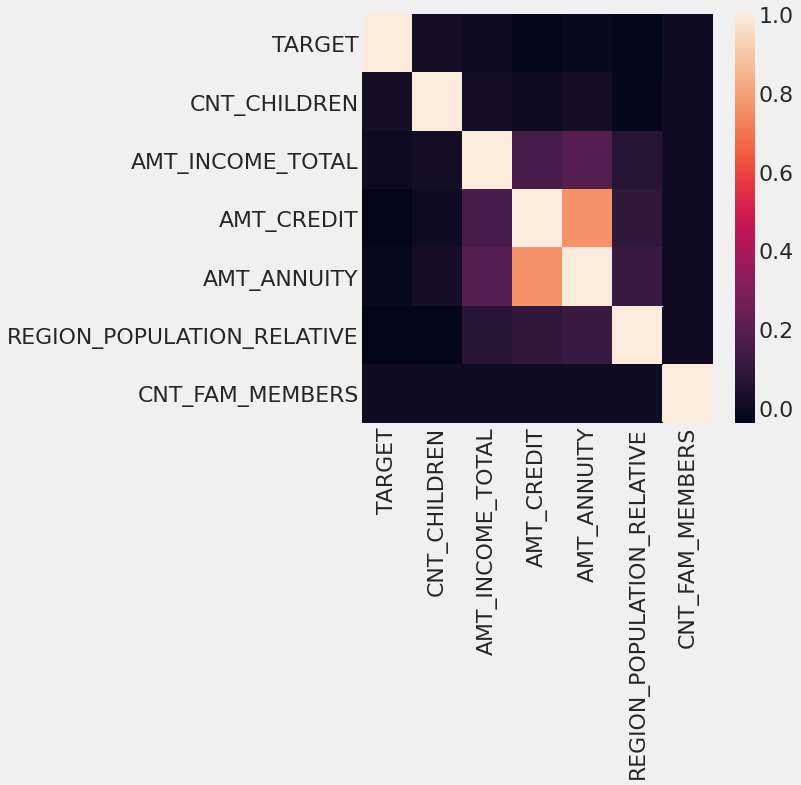

In [51]:
# Heatmap numeric variables
plt.figure(figsize=(7, 7))
sns.heatmap(df.corr())

## Missing values

In [16]:
df.nunique()

SK_ID_CURR                    307511
TARGET                             2
NAME_CONTRACT_TYPE                 2
CODE_GENDER                        3
FLAG_OWN_CAR                       2
FLAG_OWN_REALTY                    2
CNT_CHILDREN                      15
AMT_INCOME_TOTAL                2548
AMT_CREDIT                      5603
AMT_ANNUITY                    13672
AMT_GOODS_PRICE                 1002
NAME_TYPE_SUITE                    8
NAME_INCOME_TYPE                   8
NAME_EDUCATION_TYPE                5
NAME_FAMILY_STATUS                 6
NAME_HOUSING_TYPE                  6
REGION_POPULATION_RELATIVE        81
OWN_CAR_AGE                       62
FLAG_PHONE                         2
FLAG_EMAIL                         2
OCCUPATION_TYPE                   18
CNT_FAM_MEMBERS                   17
REGION_RATING_CLIENT               3
HOUR_APPR_PROCESS_START           24
ORGANIZATION_TYPE                 58
EXT_SOURCE_1                  114584
EXT_SOURCE_2                  119828
E

In [17]:
# Missing values
df.isnull().any()

SK_ID_CURR                    False
TARGET                        False
NAME_CONTRACT_TYPE            False
CODE_GENDER                   False
FLAG_OWN_CAR                  False
FLAG_OWN_REALTY               False
CNT_CHILDREN                  False
AMT_INCOME_TOTAL              False
AMT_CREDIT                    False
AMT_ANNUITY                    True
AMT_GOODS_PRICE                True
NAME_TYPE_SUITE               False
NAME_INCOME_TYPE              False
NAME_EDUCATION_TYPE           False
NAME_FAMILY_STATUS            False
NAME_HOUSING_TYPE             False
REGION_POPULATION_RELATIVE    False
OWN_CAR_AGE                    True
FLAG_PHONE                    False
FLAG_EMAIL                    False
OCCUPATION_TYPE                True
CNT_FAM_MEMBERS                True
REGION_RATING_CLIENT          False
HOUR_APPR_PROCESS_START       False
ORGANIZATION_TYPE             False
EXT_SOURCE_1                   True
EXT_SOURCE_2                   True
EXT_SOURCE_3                

In [18]:
# Quantify number of missing values
df.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
OWN_CAR_AGE                   202929
FLAG_PHONE                         0
FLAG_EMAIL                         0
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    2
REGION_RATING_CLIENT               0
HOUR_APPR_PROCESS_START            0
ORGANIZATION_TYPE                  0
EXT_SOURCE_1                  173378
EXT_SOURCE_2                     660
E

In [19]:
# Percentage of missing values in each column
mis_val = ((df.isna().sum()) / len(df.index)).sort_values(ascending=False)
mis_val = mis_val[mis_val > 0]
print(mis_val * 100)

OWN_CAR_AGE                  65.991
EXT_SOURCE_1                 56.381
OCCUPATION_TYPE              31.346
EXT_SOURCE_3                 19.825
AMT_REQ_CREDIT_BUREAU_YEAR   13.502
AMT_REQ_CREDIT_BUREAU_MON    13.502
AMT_REQ_CREDIT_BUREAU_WEEK   13.502
AMT_REQ_CREDIT_BUREAU_DAY    13.502
AMT_REQ_CREDIT_BUREAU_HOUR   13.502
AMT_REQ_CREDIT_BUREAU_QRT    13.502
EXT_SOURCE_2                  0.215
AMT_GOODS_PRICE               0.090
AMT_ANNUITY                   0.004
CNT_FAM_MEMBERS               0.001
dtype: float64


In [20]:
# Drop columns where missing values > 30%
df.drop(mis_val[mis_val > 0.3].index, axis=1, inplace=True)

In [21]:
# Drop rows where missing values > 30
df.dropna(axis=0, thresh=8, inplace=True)

In [22]:
df.shape

(307511, 31)

In [23]:
# quantify number of missing values
df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                   0
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
FLAG_PHONE                        0
FLAG_EMAIL                        0
CNT_FAM_MEMBERS                   2
REGION_RATING_CLIENT              0
HOUR_APPR_PROCESS_START           0
ORGANIZATION_TYPE                 0
EXT_SOURCE_2                    660
EXT_SOURCE_3                  60965
AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK  

### Impute Missing Values

In [24]:
# numeric columns
df.fillna(df.select_dtypes(include='number').mean().iloc[0], inplace=True)

# categorical columns
df.fillna(df.select_dtypes(include='object').mode().iloc[0], inplace=True)

In [25]:
# unique values
uni_val = df.apply(lambda x: len(pd.unique(x)), axis=0).sort_values(ascending=False)
uni_val

SK_ID_CURR                    307511
EXT_SOURCE_2                  119829
AMT_ANNUITY                    13673
AMT_CREDIT                      5603
AMT_INCOME_TOTAL                2548
AMT_GOODS_PRICE                 1003
EXT_SOURCE_3                     815
REGION_POPULATION_RELATIVE        81
ORGANIZATION_TYPE                 58
AMT_REQ_CREDIT_BUREAU_YEAR        26
AMT_REQ_CREDIT_BUREAU_MON         25
HOUR_APPR_PROCESS_START           24
CNT_FAM_MEMBERS                   18
CNT_CHILDREN                      15
AMT_REQ_CREDIT_BUREAU_QRT         12
AMT_REQ_CREDIT_BUREAU_WEEK        10
AMT_REQ_CREDIT_BUREAU_DAY         10
NAME_INCOME_TYPE                   8
NAME_TYPE_SUITE                    8
AMT_REQ_CREDIT_BUREAU_HOUR         6
NAME_HOUSING_TYPE                  6
NAME_FAMILY_STATUS                 6
NAME_EDUCATION_TYPE                5
CODE_GENDER                        3
REGION_RATING_CLIENT               3
FLAG_PHONE                         2
FLAG_EMAIL                         2
F

## Drop columns

In [26]:
# Lets sample the count for variables having unique values
def column_analyse(x, df=df): 
    print(df[x].value_counts(), '\n', df[x].value_counts()/len(df[x]))

column_analyse('TARGET') 
column_analyse('NAME_CONTRACT_TYPE')
column_analyse('FLAG_EMAIL')

0    282686
1     24825
Name: TARGET, dtype: int64 
 0   0.919
1   0.081
Name: TARGET, dtype: float64
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64 
 Cash loans        0.905
Revolving loans   0.095
Name: NAME_CONTRACT_TYPE, dtype: float64
0    290069
1     17442
Name: FLAG_EMAIL, dtype: int64 
 0   0.943
1   0.057
Name: FLAG_EMAIL, dtype: float64


### Observation

* We will remove SK_ID_CURR as it is 100% unique
* TARGET, NAME_CONTRACT_TYPE and FLAG_EMAIL are highly imbalanced, more than 90%
* AMT_GOODS_PRICE is highly correlated with AMT_CREDIT
* ORGANIZATION_TYPE has a high cardinality: 58 distinct values
* EXT_SOURCE_2, EXT_SOURCE_3 are too detailed for analysis
* ML models should be trained to predict the customer behavior before the loan application is processed, thus AMT_REQ_CREDIT_BUREAU data are removed

In [27]:
delete_cols = ['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'FLAG_EMAIL', 'FLAG_PHONE',
               'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_2', 
               'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'ORGANIZATION_TYPE',
               'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 
               'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 
               'AMT_REQ_CREDIT_BUREAU_YEAR']

df.drop(delete_cols, axis=1, inplace=True)

In [28]:
df.shape

(307511, 16)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   TARGET                      307511 non-null  int64  
 1   CODE_GENDER                 307511 non-null  object 
 2   FLAG_OWN_CAR                307511 non-null  object 
 3   FLAG_OWN_REALTY             307511 non-null  object 
 4   CNT_CHILDREN                307511 non-null  int64  
 5   AMT_INCOME_TOTAL            307511 non-null  float64
 6   AMT_CREDIT                  307511 non-null  float64
 7   AMT_ANNUITY                 307511 non-null  float64
 8   NAME_TYPE_SUITE             307511 non-null  object 
 9   NAME_INCOME_TYPE            307511 non-null  object 
 10  NAME_EDUCATION_TYPE         307511 non-null  object 
 11  NAME_FAMILY_STATUS          307511 non-null  object 
 12  NAME_HOUSING_TYPE           307511 non-null  object 
 13  REGION_POPULAT

# Exploratory Data Analysis

In [30]:
for i in df.select_dtypes(include=['object']).columns:
    df.drop(labels=i, axis=1, inplace=True)

Text(0.5, 1.0, 'Target Distribution')

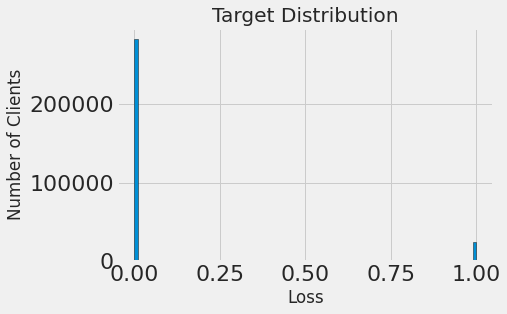

In [31]:
# Single Variable Plots
figsize=(8, 8)

# Histogram of the loss
plt.style.use('fivethirtyeight')
plt.hist(df['TARGET'], bins = 100, edgecolor = 'k')
plt.xlabel('Loss') 
plt.ylabel('Number of Clients');
plt.title('Target Distribution')

In [32]:
# # Correlations between Features and Target

# Find all correlations and sort 
correlations_data = df.corr()['TARGET'].sort_values()

# Print the most positive correlations
print(correlations_data.tail(15), '\n')

# Print the most negative correlations
print(correlations_data.head(15))

REGION_POPULATION_RELATIVE   -0.037
AMT_CREDIT                   -0.030
AMT_ANNUITY                  -0.013
AMT_INCOME_TOTAL             -0.004
CNT_FAM_MEMBERS              -0.001
CNT_CHILDREN                  0.019
TARGET                        1.000
Name: TARGET, dtype: float64 

REGION_POPULATION_RELATIVE   -0.037
AMT_CREDIT                   -0.030
AMT_ANNUITY                  -0.013
AMT_INCOME_TOTAL             -0.004
CNT_FAM_MEMBERS              -0.001
CNT_CHILDREN                  0.019
TARGET                        1.000
Name: TARGET, dtype: float64


In [33]:
for i in df.columns:
    if len(set(df[i]))==1:
        df.drop(labels=[i], axis=1, inplace=True)

In [34]:
# Find all correlations and sort 
correlations_data = df.corr()['TARGET'].sort_values()

# Print the most positive correlations
print(correlations_data.tail(15), '\n')

# Print the most negative correlations
print(correlations_data.head(15))

REGION_POPULATION_RELATIVE   -0.037
AMT_CREDIT                   -0.030
AMT_ANNUITY                  -0.013
AMT_INCOME_TOTAL             -0.004
CNT_FAM_MEMBERS              -0.001
CNT_CHILDREN                  0.019
TARGET                        1.000
Name: TARGET, dtype: float64 

REGION_POPULATION_RELATIVE   -0.037
AMT_CREDIT                   -0.030
AMT_ANNUITY                  -0.013
AMT_INCOME_TOTAL             -0.004
CNT_FAM_MEMBERS              -0.001
CNT_CHILDREN                  0.019
TARGET                        1.000
Name: TARGET, dtype: float64


In [35]:
df.shape

(307511, 7)

### Feature Engineering and Selection

In [36]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        Threshold: any features with correlations greater than this value are removed
    
    Output: 
        Dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between TARGET
    y = x['TARGET']
    x = x.drop(columns = ['TARGET'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    
    # Add the score back in to the data
    x['TARGET'] = y
               
    return x

In [37]:
# Remove the collinear features above a specified correlation coefficient
data = remove_collinear_features(df, 0.8);

In [38]:
df.shape

(307511, 7)

# Split dataset into train and test subsets

In [39]:
# Prepare dataset for training and testing (Stratified)
# As our dataset is skewed, stratification is used to allocate
# the samples evenly based on sample classes, so that training set and
# test set have similiar ratio of classes
X = data.drop(columns='TARGET')
y = pd.DataFrame(data['TARGET'])

# Split into 80% training and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.2, 
                                                    random_state=42
                                                    )

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(246008, 6)
(61503, 6)
(246008, 1)
(61503, 1)


In [40]:
# SMOTE
# We want to implement our model on LIVE data
# Thus, we add synthetic data to the training set only after splitting our dataset
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42)

In [41]:
# Feature Scaling
# Scale numeric variables using Robust Scaler that is robust to outliers
# Robust Scaler, scales the data in the IQR and ignore the effect of the outliers
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [42]:
# Convert y to one-dimensional array (vector)
y_train = np.array(y_train).reshape((-1, ))
y_test = np.array(y_test).reshape((-1, ))

In [43]:
X_train

array([[ 2.        , -0.64      , -0.53329156, -0.64767355, -0.56922335,
         2.        ],
       [ 0.        , -0.64      , -0.65543024, -0.65289873, -0.84584874,
         0.        ],
       [ 0.        , -0.14      ,  0.39741855,  0.07763125,  0.09985528,
        -1.        ],
       ...,
       [ 0.        , -0.64      , -0.4983208 , -0.02264245,  0.33842526,
         0.        ],
       [ 0.        , -0.39      ,  0.54807853,  0.11047524, -0.03435708,
         0.        ],
       [ 0.        , -0.24      ,  0.9959482 ,  0.1634735 ,  0.        ,
         0.        ]])

In [44]:
X_test

array([[ 1.        ,  0.125     ,  0.4793985 ,  0.31736154, -0.46647371,
         1.        ],
       [ 0.        , -0.625     , -0.27321637, -0.27728687, -0.61746261,
         0.        ],
       [ 0.        ,  0.025     , -0.42265664, -0.34822651, -0.23508603,
         0.        ],
       ...,
       [ 1.        ,  2.375     , -0.50536341,  0.11723709, -0.45955941,
         1.        ],
       [ 0.        ,  2.125     ,  0.7202005 ,  1.16241444, -0.49418449,
        -1.        ],
       [ 1.        ,  0.875     , -0.46676692,  0.18021157, -0.63407836,
         1.        ]])

# Modeling

In [45]:
# Models to Evaluate

# We will compare five different ML Cassification models:

# 1 - Naive Bayes
# 2 - Logistic Regression
# 2 - Random Forest Classification
# 3 - Gradiente Boosting Classification

# Function to calculate mean absolute error
def cross_val(X_train, y_train, model):
    # Applying k-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
    return accuracies.mean()


# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_cross = cross_val(X_train, y_train, model)
     
    # Return the performance metric
    return model_cross

In [46]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb_cross = fit_and_evaluate(nb)

print('Naive Bayes Performance on the test set: Cross Validation Score = %0.4f' % nb_cross)

Naive Bayes Performance on the test set: Cross Validation Score = 0.1273


Cross_val_score takes the dataset and applies cross validation to split the data. Then, train a model using the specified estimator and measure the performance of the model (scoring parameter) i.e 13% for Naive Bayes

In [47]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42, 
                        class_weight='balanced',
                        n_jobs=-1)
lr_cross = fit_and_evaluate(lr)
print('Logistic Regression Performance on the test set: Cross Validation Score = %0.4f' % lr_cross)

Logistic Regression Performance on the test set: Cross Validation Score = 0.5071


Cross_val_score takes the dataset and applies cross validation to split the data. Then, train a model using the specified estimator and measure the performance of the model (scoring parameter) i.e 51% for Logistic Regression

In [48]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10,
                            class_weight='balanced',
                            random_state=42,
                            n_jobs=-1, 
                            criterion='entropy')
rf_cross = fit_and_evaluate(rf)

print('Random Forest Performance on the test set: Cross Validation Score = %0.4f' % rf_cross)

Random Forest Performance on the test set: Cross Validation Score = 0.9086


Cross_val_score takes the dataset and applies cross validation to split the data. Then, train a model using the specified estimator and measure the performance of the model (scoring parameter) i.e 91% for Random Forest

In [50]:
# Gradiente Boosting Classification
from xgboost import XGBClassifier
gbc = XGBClassifier(random_state=42,
                   n_estimators=200)
gbc_cross = fit_and_evaluate(gbc)

print('Gradiente Boosting Classification Performance on the test set: Cross Validation Score = %0.4f' % gbc_cross)

Gradiente Boosting Classification Performance on the test set: Cross Validation Score = 0.9193


Cross_val_score takes the dataset and applies cross validation to split the data. Then, train a model using the specified estimator and measure the performance of the model (scoring parameter) i.e 92% for Gradient Boosting